In [4]:
import pandas as pd

In [5]:
 
test = pd.read_csv("./data/long-customer-test.csv")
short = pd.read_csv("./data/short-customer-data.csv")
data = pd.read_excel("./res/result1_2.xlsx")

In [6]:
# train.head()

In [7]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0


In [8]:
# train

In [9]:
def age_con(x):
    if (0<=x)&(x<=3):
        return '新客户'
    elif (3<x)&(x<=6):
        return '稳定客户'
    else:
        return '老客户'
data['Status'] = data['Tenure'].apply(lambda x:age_con(x))

In [10]:
def bla_con(x):
    if (0<=x)&(x<=50000):
        return '低资产'
    elif (50000<x)&(x<=90000):
        return '中下资产'
    elif (90000<x)&(x<=120000):
        return '中上资产'
    else:
        return '高资产'
data['AssetStage'] = data['Balance'].apply(lambda x:bla_con(x))

In [11]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,老客户,中上资产
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,老客户,高资产
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,老客户,中上资产
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,新客户,高资产


In [12]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,老客户,中上资产
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,老客户,高资产
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,老客户,中上资产
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,新客户,高资产


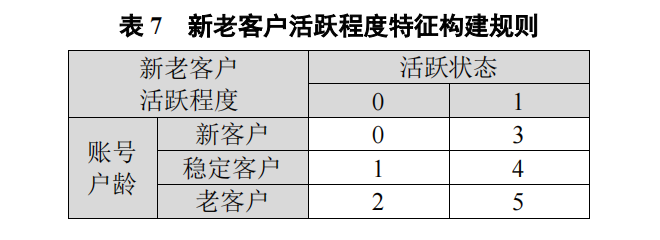

# 构建新老客户活跃程度的特征

In [13]:
def Status_con(x):
    if x=='新客户0':
        return 0
    elif x=='稳定客户0':
        return 1
    elif x=='老客户0':
        return 2
    elif x=='新客户1':
        return 3
    elif x=='稳定客户1':
        return 4
    elif x=='老客户1':
        return 5

In [14]:
data['IsActiveStatus'] = (data['Status']+data['IsActiveMember'].astype('str')).apply(lambda x:Status_con(x))

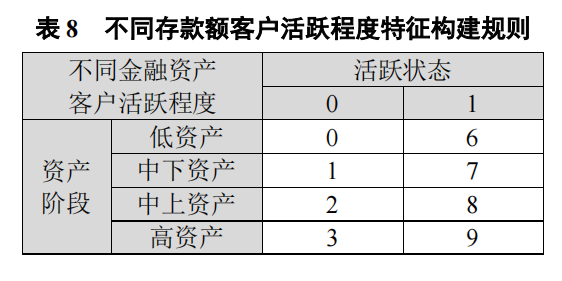

# 构建不同金融资产客户活跃程度的特征

In [15]:
def Balance_con(x):
    if x=='低资产0':
        return 0
    elif x=='中下资产0':
        return 1
    elif x=='中上资产0':
        return 2
    elif x=='高资产0':
        return 3
    elif x=='低资产1':
        return 6
    elif x=='中下资产1':
        return 7
    elif x=='中上资产1':
        return 8
    elif x=='高资产1':
        return 9

In [16]:
data['IsActiveAssetStage'] = (data['AssetStage']+data['IsActiveMember'].astype('str')).apply(lambda x:Balance_con(x))

In [17]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage,IsActiveStatus,IsActiveAssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产,3,9
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产,5,6
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产,2,2
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产,0,0
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,老客户,中上资产,2,2
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,老客户,高资产,5,9
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,老客户,中上资产,5,8
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,新客户,高资产,3,9


# 构建不同金融资产信用卡持有状态的特征

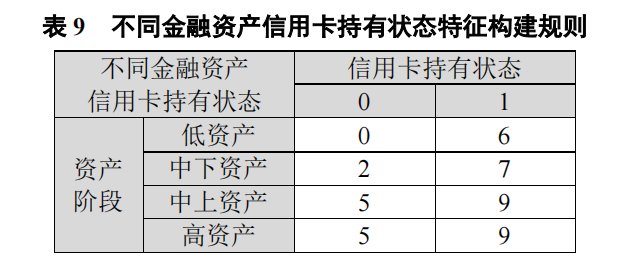

In [18]:
def HasCrCard_con(x):
    if x=='低资产0':
        return 0
    elif x=='中下资产0':
        return 2
    elif x=='中上资产0':
        return 5
    elif x=='高资产0':
        return 5
    elif x=='低资产1':
        return 6
    elif x=='中下资产1':
        return 7
    elif x=='中上资产1':
        return 9
    elif x=='高资产1':
        return 9

In [19]:
data['CrCardAssetStage'] = (data['AssetStage']+data['HasCrCard'].astype('str')).apply(lambda x:HasCrCard_con(x))

In [21]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产,3,9,9
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产,5,6,6
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产,2,2,5
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产,0,0,6
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,老客户,中上资产,2,2,5
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,老客户,高资产,5,9,9
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,老客户,中上资产,5,8,9
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,新客户,高资产,3,9,9


In [22]:
data.drop(columns=['Status','AssetStage'])

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,3,9,9
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,5,6,6
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,2,2,5
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,0,0,6
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,2,2,5
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,5,9,9
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,5,8,9
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,3,9,9


In [23]:
data.to_excel("./res/result4.xlsx",encoding='utf-8',index=False)

C:\Users\dupeibo\Anaconda3\envs\pt\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
